In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from nnModels import PeripheryNet, FoveaNet
from helper import processForValidation, formRGBImage

Using Theano backend.
/usr/local/lib/python2.7/dist-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
pImgs, pAns = np.load('data/peripheryImages.npy'), np.load('data/peripheryIndexes.npy')
pImgs, pAns = processForValidation(pImgs, pAns, 4)
fImgs, fAns = np.load('data/fovealImages.npy'), np.load('data/fovealIndexes.npy')
fImgs, fAns = processForValidation(fImgs, fAns, 20)

In [3]:
periModel = PeripheryNet()
periModel.load('weights/92pPeriphery')

foveModel = FoveaNet()
foveModel.load('weights/99pFoveaNet')

In [4]:
pPredictions = periModel.predict(pImgs)
fPredictions = foveModel.predict(fImgs)

In [5]:
print float(np.sum(np.argmax(pPredictions, axis=1) == np.argmax(pAns, axis=1))/len(pPredictions)
print np.sum(np.argmax(fPredictions, axis=1) == np.argmax(fAns, axis=1))/len(fPredictions)

0
0


In [27]:
i=0

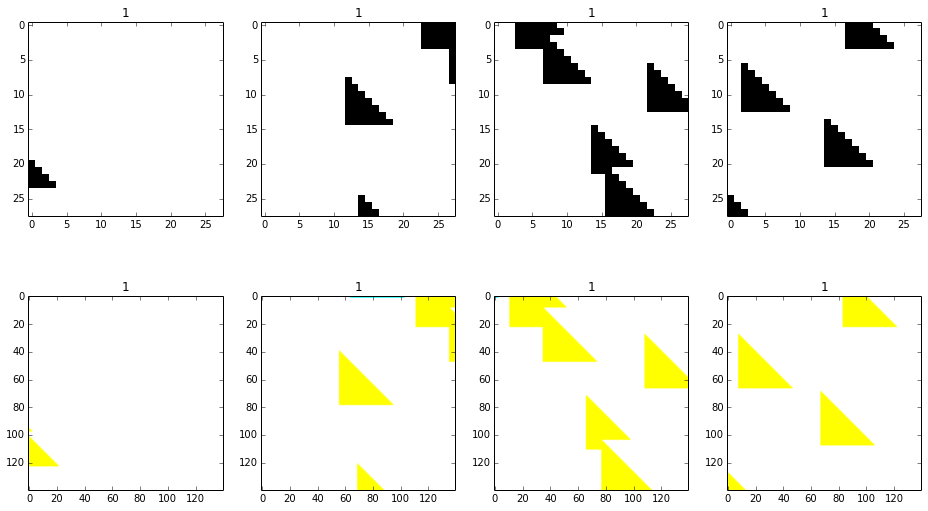

In [32]:
plt.figure(figsize=(16,9),dpi=100)
for _ in range(4):
    plt.subplot(241+_)
    plt.imshow(pImgs[i+_][0], cmap='gray', interpolation='nearest')
    plt.title('%s'%np.argmax(pAns[i+_]))
    plt.subplot(241+_+4)
    plt.imshow(formRGBImage(fImgs[i+_]))
    plt.title('%s'%np.argmax(pAns[i+_]))
i+=1